In [1]:
#import the dataset
import pandas as pd
SDG = pd.read_csv("SDG_goal3_clean (3).csv")

In [2]:
# This dataset has too many variables, and most of the names are long
# I will only select two independent variables and a dependent variable 
# Also shorten their column names for convenience

SDG.rename(columns={ 
             "Proportion of births attended by skilled health personnel (%)"
    : "PBS", 
             "Infant mortality rate (deaths per 1,000 live births):::BOTHSEX" 
    : "IMRB", 
             "Universal health coverage (UHC) service coverage index" 
    : "UHCI", 
    
            },inplace = True)

SDG = SDG[["PBS","IMRB","UHCI"]]

In [3]:
SDG.head()

PBS  IMRB  UHCI
0  99.1  24.1    44
1  96.8  27.0    44
2  97.8  21.3    45
3  99.5  16.5    57
4  99.3   5.1    79

In [4]:
import numpy as np
from sklearn import metrics

In [5]:
from sklearn.model_selection import train_test_split
# Input variables
X = SDG[['PBS','UHCI']]
# Target variable
y = SDG['IMRB']
# Split 90% datasets for training and 10% datasets for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=44)

In [6]:
# Rescale（necessary to linear model）
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
# Standarllized （x-mean)/sd
# Make attributes in different columns comparable
X_train_standard = scal.fit_transform(X_train)
X_test_standard = scal.transform(X_test)

In [7]:
from sklearn import linear_model
# Construct the predictive model
B_reg = linear_model.BayesianRidge().fit(X_train_standard, y_train)
# Use the predictive model to predict the testing data
y_pred = B_reg.predict(X_test_standard)

In [8]:
# Evaluation
# Two measurements of success to test the accuracy of predictive model

# 1.Root mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
from math import sqrt
print("Root mean squared error:",sqrt(mse))

# 2.R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score:",r2)


Root mean squared error: 5.916328848876616
R-squared score: 0.57153686942499


The Root mean squared error to test the accuracy of predictive model,
the lower the RMSE, the lower the error of the model. The RMSE value we got
was about 5.916. This is a small value which means the predictive model 
is relatively accurate, has good fit.

The value R-squared score was about 0.572 which is really close to one
(perfect prediction). Also proved that it has good fit.

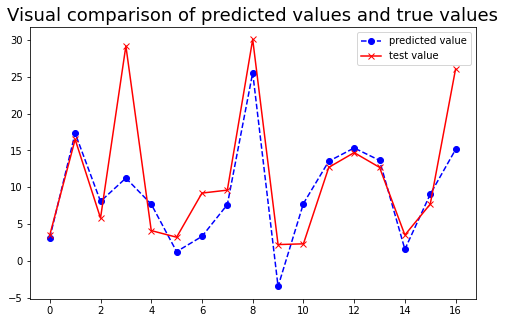

In [9]:
# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(y_pred)), y_pred, 'bo--', label = 'predicted value')
plt.plot(np.arange(len(y_test)), y_test, 'rx-', label = 'test value')
plt.title('Visual comparison of predicted values and true values'
          , fontsize = 18)
plt.legend()
plt.show()